# Least Squares Models

In [329]:
%matplotlib inline
import numpy as np
from cross_validation import cross_validation
from polynomial import build_poly
import matplotlib.pyplot as plt
from implementations import least_squares

In [330]:
X_train = np.load("X_train.npy")
y_train = np.load("y_train_1-1.npy")
print(X_train.shape)
print(y_train.shape)

(250000, 14)
(250000,)


# Splitting into 3 subsets

We split the dataset using PRI_jet_num column

In [331]:
X_pri_0 = X_train[(X_train[:, -2] == 0), :]
X_pri_1 = X_train[(X_train[:, -2] == 1), :]
X_pri_23 = X_train[(X_train[:, -2] == 2) | (X_train[:, -2] == 3), :]

y_pri_0 = y_train[(X_train[:, -2] == 0)]
y_pri_1 = y_train[(X_train[:, -2] == 1)]
y_pri_23 = y_train[(X_train[:, -2] == 2) | (X_train[:, -2] == 3)]

In [332]:
X_pri_0 = np.delete(X_pri_0, np.s_[12], axis=1)
X_pri_1 = np.delete(X_pri_1, np.s_[12], axis=1)
X_pri_23 = np.delete(X_pri_23, np.s_[12], axis=1)

print("PRI_0: {}".format(X_pri_0.shape))
print("PRI_1: {}".format(X_pri_1.shape))
print("PRI_23: {}".format(X_pri_23.shape))

print("\ny_PRI_0: {}".format(y_pri_0.shape))
print("y_PRI_1: {}".format(y_pri_1.shape))
print("y_PRI_23: {}".format(y_pri_23.shape))

PRI_0: (99913, 13)
PRI_1: (77544, 13)
PRI_23: (72543, 13)

y_PRI_0: (99913,)
y_PRI_1: (77544,)
y_PRI_23: (72543,)


In [333]:
selected_features = np.array([1,3,9,10,11,13,21,23])
selected_features = np.sort(np.append(selected_features, [0,4,5,6,12]))
print(selected_features)

[ 0  1  3  4  5  6  9 10 11 12 13 21 23]


In [334]:
delete_columns_0 = []

for i in range(X_pri_0.shape[1]):
    if np.isin(True, (X_pri_0[:,i] == -999)):
        delete_columns_0.append(i)
        
delete_columns_0

[3, 4, 5, 9, 12]

In [335]:
delete_columns_1 = []

for i in range(X_pri_1.shape[1]):
    if np.isin(True, (X_pri_1[:,i] == -999)):
        delete_columns_1.append(i)
        
delete_columns_1

[3, 4, 5, 9]

In [336]:
X_pri_0 = np.delete(X_pri_0, np.s_[delete_columns_0], axis=1)  
X_pri_0.shape

(99913, 8)

In [337]:
X_pri_1 = np.delete(X_pri_1, np.s_[delete_columns_1], axis=1)  
X_pri_1.shape

(77544, 9)

In [338]:
print("PRI_0: {}".format(X_pri_0.shape))
print("PRI_1: {}".format(X_pri_1.shape))
print("PRI_23: {}".format(X_pri_23.shape))

PRI_0: (99913, 8)
PRI_1: (77544, 9)
PRI_23: (72543, 13)


# Least Squares Models for 3 subsets

## Add polynomial features

In [339]:
degrees = np.linspace(2,10,9).astype(int)
degrees

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

## Rank deficiency test for polynomial features

More than 10 degree brings rank deficiency

In [340]:
def rank_deficiency(degrees, X):
    for degree in degrees:
        created = build_poly(pri_2, degree)
        if created.shape[1] != np.linalg.matrix_rank(created):
            return True
    return False

In [341]:
print("PRI_0: {}".format(rank_deficiency(degrees, X_pri_0)))
print("PRI_1: {}".format(rank_deficiency(degrees, X_pri_1)))
print("PRI_23: {}".format(rank_deficiency(degrees, X_pri_23)))

PRI_0: False
PRI_1: False
PRI_23: False


## Model training

### Training for PRI_0 subset

Optimum degree = 10

In [342]:
pars = {'degrees': degrees}
pri0_tr_acc, pri0_te_acc = cross_validation(y_pri_0, X_pri_0, 5, h_pars=pars, model='least')

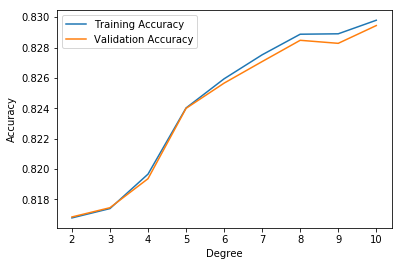

In [343]:
plt.plot(pri0_tr_acc[:,0], pri0_tr_acc[:,1], label='Training Accuracy')
plt.plot(pri0_te_acc[:,0], pri0_te_acc[:,1], label='Validation Accuracy')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.legend()

In [344]:
pri0_te_acc

array([[ 2.        ,  0.81683515],
       [ 3.        ,  0.8174457 ],
       [ 4.        ,  0.81935742],
       [ 5.        ,  0.82399159],
       [ 6.        ,  0.82565309],
       [ 7.        ,  0.82707437],
       [ 8.        ,  0.82847563],
       [ 9.        ,  0.82827545],
       [10.        ,  0.8294465 ]])

### Training for PRI_1 subset

Optimum degree = 9

In [345]:
pri1_tr_acc, pri1_te_acc = cross_validation(y_pri_1, X_pri_1, 5, h_pars=pars, model='least')

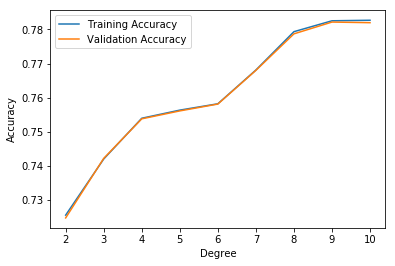

In [346]:
plt.plot(pri1_tr_acc[:,0], pri1_tr_acc[:,1], label='Training Accuracy')
plt.plot(pri1_te_acc[:,0], pri1_te_acc[:,1], label='Validation Accuracy')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.legend()

In [347]:
pri1_te_acc

array([[ 2.        ,  0.72468403],
       [ 3.        ,  0.74215889],
       [ 4.        ,  0.7537658 ],
       [ 5.        ,  0.75608718],
       [ 6.        ,  0.75809905],
       [ 7.        ,  0.76799071],
       [ 8.        ,  0.77870776],
       [ 9.        ,  0.78216404],
       [10.        ,  0.78198349]])

### Training for PRI_23 subset

Optimum degree = 10

In [348]:
pri23_tr_acc, pri23_te_acc = cross_validation(y_pri_23, X_pri_23, 5, h_pars=pars, model='least')

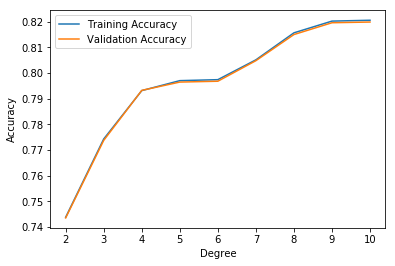

In [349]:
plt.plot(pri23_tr_acc[:,0], pri23_tr_acc[:,1], label='Training Accuracy')
plt.plot(pri23_te_acc[:,0], pri23_te_acc[:,1], label='Validation Accuracy')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.legend()

In [355]:
pri23_te_acc

array([[ 2.        ,  0.74347946],
       [ 3.        ,  0.77373863],
       [ 4.        ,  0.79325889],
       [ 5.        ,  0.79649848],
       [ 6.        ,  0.79682934],
       [ 7.        ,  0.8048525 ],
       [ 8.        ,  0.81505376],
       [ 9.        ,  0.81965812],
       [10.        ,  0.81993383]])

# Least Squares - Validation Set Accuracy

In [356]:
np.mean([pri23_te_acc[8,1],
        pri1_te_acc[7,1],
        pri0_te_acc[8,1]])

0.8105147919423715